## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')

## Importing the Dataset

In [2]:
uniVariateData = pd.read_csv('univariateData.dat')

In [3]:
uniVariateData.head()

,6.1101,17.592
0,5.5277,9.1302
1,8.5186,13.6620
2,7.0032,11.8540
3,5.8598,6.8233
4,8.3829,11.8860


In [4]:
uniVariateData.describe()

,6.1101,17.592
count,96.000000,96.000000
mean,8.181151,5.716709
std,3.884451,5.404947
min,5.026900,-2.680700
25%,5.690950,1.952550
50%,6.735950,4.455300
75%,8.639925,6.879150
max,22.203000,24.147000


In [5]:
features = uniVariateData.iloc[:, :-1].values
dependant_variable = uniVariateData.iloc[:, -1].values

## Splitting into training and test sets

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, dependant_variable, test_size = 1/3, random_state = 0)

## Training the simple linear regression model

In [7]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the test results

In [10]:
y_pred = regressor.predict(X_test)

## Visualize the regressor line

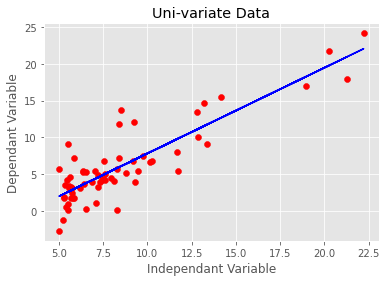

In [11]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Uni-variate Data')
plt.xlabel('Independant Variable')
plt.ylabel('Dependant Variable')
plt.show()

-----------------------

## Create the linear regression implementation

In [12]:
import matplotlib.pyplot as plt 

class LinearRegression:
    def __init__(self, alpha=0.01, max_iterations=1000, visualize=True, normalize=False):
        
        self.alpha = alpha
        self.max_iterations = max_iterations
        self.visualize = visualize
        self.normalize = normalize

    def fit(self, X, y):
        self.m, self.n = X.shape
        self.theta = np.zeros((self.n, 1))
        self.X = X
        self.y = y

        if self.normalize:
            self.X = self.normalize_features(self.X)

        for i in range(self.max_iterations):
            self.gradient_descent()
            self.cost_function()
        if self.visualize:
            self.plot()
    def normalize_features(self, X):
        mean = np.mean(X, axis=0)
        std = np.std(X, axis=0)
        return (X - mean) / std
    def predict(self, X):
        if self.normalize:
            X = self.normalize_features(X)
        return X.dot(self.theta)
    def gradient_descent(self):
        self.theta = self.theta - self.alpha * self.cost_function_derivative()
    def cost_function(self):
        self.cost = np.sum((self.X.dot(self.theta) - self.y) ** 2) / (2 * self.m)
    def cost_function_derivative(self):
        return (self.X.T.dot(self.X.dot(self.theta) - self.y) / self.m)
    def plot(self):
        plt.scatter(self.X, self.y)
        plt.plot(self.X, self.predict(self.X), color='red')
        plt.show()

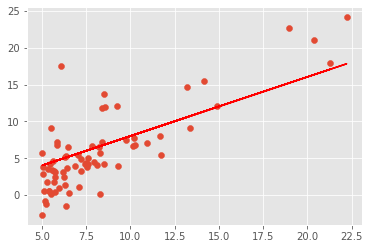

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

data = pd.read_csv("uniVariateData.dat", header=None)

X, y = data.iloc[:, :-1].values, data.iloc[:, -1].values

y = y.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y)

lr_clf = LinearRegression(alpha=0.01, max_iterations=1500, visualize=True)

lr_clf.fit(X_train, y_train)

In [14]:
from sklearn.metrics import mean_squared_error

y_predicted = lr_clf.predict(X_test)

print(mean_squared_error(y_test, y_predicted, squared=False))

2.9002672873632482


In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

data = pd.read_csv("multivariateData.dat", header=None)

X, y = data.iloc[:, :-1].values, data.iloc[:, -1].values

y = y.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y)

lr_clf = LinearRegression(alpha=0.01, max_iterations=1500, visualize=False, normalize=True)

lr_clf.fit(X_train, y_train)

In [16]:
from sklearn.metrics import mean_squared_error

y_predicted = lr_clf.predict(X_test)

print(mean_squared_error(y_test, y_predicted, squared=False))

378222.96985009435
